In [1]:
import torch 
import numpy as np
import torch.nn as nn
import random
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns 
import shutup 
shutup.please()

# Custom imports
import os
import sys
sys.path.append("../../aerolib")
import modelManagement as mm
import ploter as pl 
import dataset

In [2]:
cp_data = '../../data/cp_data/cp_data_true/AoA_0deg_Cp/'
raw_data = '../../data/raw_data/aerosense/'





In [3]:
def plot(exp, sensor):
    def p(df, sensor):
        t_raw = torch.tensor(df.values, dtype = torch.float32)
        tensor = torch.tensor(df_cp.values, dtype = torch.float32)
        return torch.transpose(tensor, 0, 1)[sensor].numpy()

    fs = 100
    del_cells = [0, 23]
    cols = np.arange(0, 38)
    use_cols = np.delete(cols, del_cells)
    _skiprows = 0

    cp_path = cp_data+f'aoa_0deg_Exp_{exp:03}_aerosense.csv'
    raw_path = raw_data+f'aoa_0deg_Exp_{exp:03}_aerosense.csv'

    df_cp = pd.read_csv(open(cp_path, 'r'), delimiter=' ', skiprows=_skiprows, usecols=use_cols)
    df_raw = pd.read_csv(open(raw_path,'r'), delimiter=',',skiprows=1, usecols=np.arange(1, 41))
    
    df_raw.fillna(0.0)
    sig_raw = p(df_raw, sensor)
    t_raw = [t1/(100) for t1 in range(len(sig_raw))]
    
    fig, ax = plt.subplots(1, 1, figsize=(10,2));  
    ax.plot(t_raw,sig_raw)
    ax.set
    ax.set_title("Raw Signal")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10,2));  
    ax.plot(t_raw[500:900],sig_raw[500:900])
    ax.set
    ax.set_title("Raw zoomed In")
    plt.tight_layout()
    plt.show()


    sig_cp = p(df_cp, sensor)
    t_cp = [t1/(100) for t1 in range(len(sig_cp))]

    fig, ax = plt.subplots(1, 1, figsize=(10,2));  
    ax.plot(t_cp,sig_cp)
    ax.set
    ax.set_title("Cp Signal")
    plt.tight_layout()
    plt.show()

    fig, ax = plt.subplots(1, 1, figsize=(10,2));  
    ax.plot(t_cp[500:900],sig_cp[500:900])
    ax.set
    ax.set_title("Cp zoomed In")
    plt.tight_layout()
    plt.show()

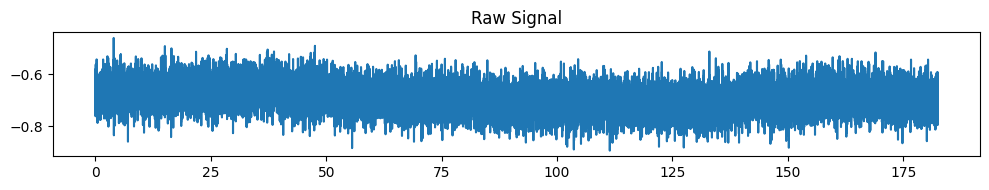

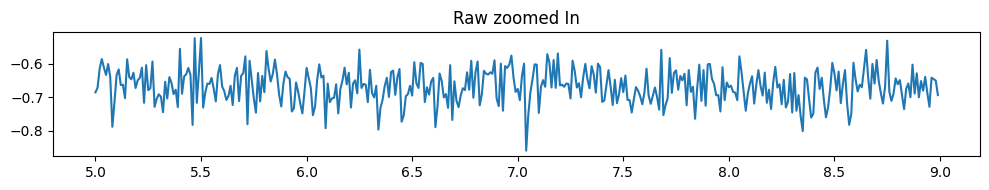

In [4]:
sensor = 25
exp = 3
plot(exp, sensor)
